## Mini Project
### Sentiment Analysis

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data_science.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241386 entries, 0 to 241385
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               241386 non-null  int64  
 1   conversation_id  241386 non-null  int64  
 2   created_at       241386 non-null  object 
 3   date             241386 non-null  object 
 4   time             241386 non-null  object 
 5   timezone         241386 non-null  int64  
 6   user_id          241386 non-null  int64  
 7   username         241386 non-null  object 
 8   name             241386 non-null  object 
 9   place            354 non-null     object 
 10  tweet            241386 non-null  object 
 11  language         241386 non-null  object 
 12  mentions         241386 non-null  object 
 13  urls             241386 non-null  object 
 14  photos           241386 non-null  object 
 15  replies_count    241386 non-null  int64  
 16  retweets_count   241386 non-null  int6

In [ ]:
df.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,2.413860e+05,2.413860e+05,241386.0,2.413860e+05,241386.000000,241386.000000,241386.000000,241386.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,9.529281e+17,9.528276e+17,530.0,2.346056e+16,1.356678,11.569076,27.964269,0.457102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.104049e+17,3.103971e+17,0.0,1.442948e+17,34.724170,140.701341,751.545541,0.498157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.333963e+09,7.333963e+09,530.0,1.300000e+01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.326473e+17,7.325960e+17,530.0,3.691232e+07,0.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.975409e+17,9.974605e+17,530.0,3.547840e+08,0.000000,3.000000,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.216005e+18,1.215739e+18,530.0,5.345640e+08,0.000000,9.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.406400e+18,1.406400e+18,530.0,1.378437e+18,5769.000000,24505.000000,150746.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1406400408545804288,1406400396264943616,2021-06-20 05:26:01 IST,2021-06-20,05:26:01,530,1113747629282930688,ballouxfrancois,Prof Francois Balloux,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1406390341176016897,1406390341176016897,2021-06-20 04:46:01 IST,2021-06-20,04:46:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1406386311481774083,1406386311481774083,2021-06-20 04:30:00 IST,2021-06-20,04:30:00,530,19402238,sciencenews,Science News,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1406383545153638402,1406383545153638402,2021-06-20 04:19:01 IST,2021-06-20,04:19:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1406358632648818689,1406358632648818689,2021-06-20 02:40:01 IST,2021-06-20,02:40:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
df['tweet'][10]

'Trends in #AI for next 5 years, including revenue, applications, and talent (#INFOGRAPHIC) ——————— #BigData #DataScience #MachineLearning #DeepLearning #ComputerVision #NLProc #DataLiteracy #AIStrategy #DigitalTransformation #EdgeAI #Edge #IoT #IIoT #IoTPL #IoTCommunity  https://t.co/mn7vFSgyyv'

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

import re
import nltk
import pandas as pd
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
sentence = df['tweet'][0]
sid.polarity_scores(sentence)['compound']
#Return a float for sentiment strength based on the input text.
        #Positive values are positive valence, negative value are negative
        #valence.

-0.1783

In [ ]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
         if w.lower() in words or not w.isalpha())
    return tweet


df['tweet_clean'] = df['tweet'].apply(cleaner)

In [ ]:
word_dict = {'manipulate':-1,'manipulative':-1,'jamescharlesiscancelled':-1,'jamescharlesisoverparty':-1,
            'pedophile':-1,'pedo':-1,'cancel':-1,'cancelled':-1,'cancel culture':0.4,'teamtati':-1,'teamjames':1,
            'teamjamescharles':1,'liar':-1}

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

list1 = []
for i in df['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [ ]:
df = df[['tweet','date','id','sentiment','sentiment_category']]
df.head()

,tweet,date,id,sentiment,sentiment_category
0,What can be done? - Never blindly trust an ab...,2021-06-20,1406400408545804288,-0.4592,negative
1,"""We need a paradigm shift from model-centric t...",2021-06-20,1406390341176016897,-0.3535,negative
2,Using high-resolution satellite data and compu...,2021-06-20,1406386311481774083,0.0000,neutral
3,.@Stephenson_Data shares four steps that will ...,2021-06-20,1406383545153638402,0.6249,positive
4,"""Curricula is inherently brittle in a world wh...",2021-06-20,1406358632648818689,0.2960,positive


In [ ]:
neg = df[df['sentiment_category']=='negative']
neg = neg.groupby(['date'],as_index=False).count()

pos = df[df['sentiment_category']=='positive']
pos = pos.groupby(['date'],as_index=False).count()

pos = pos[['date','id']]
neg = neg[['date','id']]

In [ ]:
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['date'], y=pos['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['date'], y=neg['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [ ]:
# filter the df to only capture Tweets from the start of May to end of June

newdf = df[(df['date']>='2019-05-01') & (df['date']<='2019-06-29')]

neg = newdf[newdf['sentiment_category']=='negative']
neg = neg.groupby(['date'],as_index=False).count()

pos = newdf[newdf['sentiment_category']=='positive']
pos = pos.groupby(['date'],as_index=False).count()

pos = pos[['date','id']]
neg = neg[['date','id']]

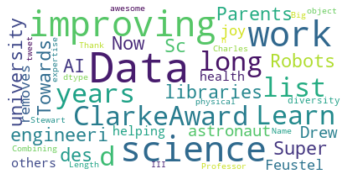

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df2 = df[(df['date']>='2019-05-11') & (df['date']<='2019-05-14')]
positive = df2[df2['sentiment_category']=='positive']
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(str(positive['tweet']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
print(df[df['sentiment_category']=='positive'])

                                                    tweet        date  \
3       .@Stephenson_Data shares four steps that will ...  2021-06-20   
4       "Curricula is inherently brittle in a world wh...  2021-06-20   
6       @LinkLabsInc @IoTchannel Wow! Wonderful!! Cong...  2021-06-20   
9       Demystifying #AI with 10 top applications:  ht...  2021-06-20   
10      Trends in #AI for next 5 years, including reve...  2021-06-20   
...                                                   ...         ...   
241370  Four short links: 15 January 2010 - Best Scien...  2010-01-15   
241375  Anti-science disinformers to media:  Please ma...  2010-01-13   
241377  @Sheril_ I'd love to see some empirical data o...  2010-01-12   
241380  Top nations in computer science:  http://bit.l...  2010-01-10   
241382  RT @filiber: Have a Computer Science backgroun...  2010-01-06   

                         id  sentiment sentiment_category  
3       1406383545153638402     0.6249           positive  
4  

In [ ]:
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['date'], y=pos['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='blue'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['date'], y=neg['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='orange'
                             )
                 )
fig.show()

In [ ]:
print(df[df['sentiment_category']=='negative'])

                                                    tweet        date  \
0       What can be done?  - Never blindly trust an ab...  2021-06-20   
1       "We need a paradigm shift from model-centric t...  2021-06-20   
5       Many common colour maps distort data through u...  2021-06-20   
19      ApolloScape (world’s largest open-source datas...  2021-06-20   
36      Disruption defines our world, and the latest h...  2021-06-19   
...                                                   ...         ...   
241355  @DanaKCTV5 We think Phil now studies weather d...  2010-02-02   
241366  @GrahamHill And to be really consequent: not o...  2010-01-21   
241371  @andrewbarnett you could, note that iphones mo...  2010-01-15   
241373  CARPE DIEM BLOG: "Structural Barriers" Discour...  2010-01-14   
241384  All in the....data RT @noahWG Dr. Petra provid...  2010-01-05   

                         id  sentiment sentiment_category  
0       1406400408545804288    -0.4592           negative  
1  